-- Maria S
## 1. Load dataset from MySql


In [63]:
# GET A SAMPLE IN ORDER TO ACHIEVE THE LOAD TO MYSQL

import pandas as pd
import numpy as np

#df = pd.read_csv('FraudTestPayU.csv',low_memory=False)

#df = df.sample(frac=0.25)

#df.to_csv('sample_fraud_test_df.csv', index = False, encoding = 'utf-8') #this one it is load to mysql 

In [64]:
#!pip3 install pymysql

In [65]:
import pymysql as sql
import os #to load environment variables 

In [66]:
##variables
db_name = os.environ.get('DB_NAME')
db_host = os.environ.get('DB_HOST')
db_username = os.environ.get('DB_USERNAME')
db_pwd = os.environ.get('DB_PASS')


In [67]:
try: 
    conn = sql.connect(host= db_host,
                           port = int(3306),
                           user = db_username,
                           passwd = db_pwd,
                           db = db_name
    )
except z:
    print(z)

In [68]:
if conn:
    print("Database connected")
else:
    print("Error")

Database connected


## 1.1. Reading dataframe


In [69]:
df = pd.read_sql_query("SELECT * FROM sample_fraud_test_df", conn)

C:\Users\isabe\AppData\Local\Temp\ipykernel_19084\891040658.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM sample_fraud_test_df", conn)


In [70]:
df.info()
#non null values there


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55834 entries, 0 to 55833
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0.1           55834 non-null  int64         
 1   Unnamed: 0             55834 non-null  int64         
 2   trans_date_trans_time  55834 non-null  datetime64[ns]
 3   cc_num                 55834 non-null  int64         
 4   merchant               55834 non-null  object        
 5   category               55834 non-null  object        
 6   amt                    55834 non-null  float64       
 7   first                  55834 non-null  object        
 8   last                   55834 non-null  object        
 9   gender                 55834 non-null  object        
 10  street                 55834 non-null  object        
 11  city                   55834 non-null  object        
 12  state                  55834 non-null  object        
 13  z

## 2. De la variable 'category' extraer únicamente aquellas que entradas que tengan mas de 15000 registros

Sample frac = 0.25. 

Text(0.5, 0, 'Counter')

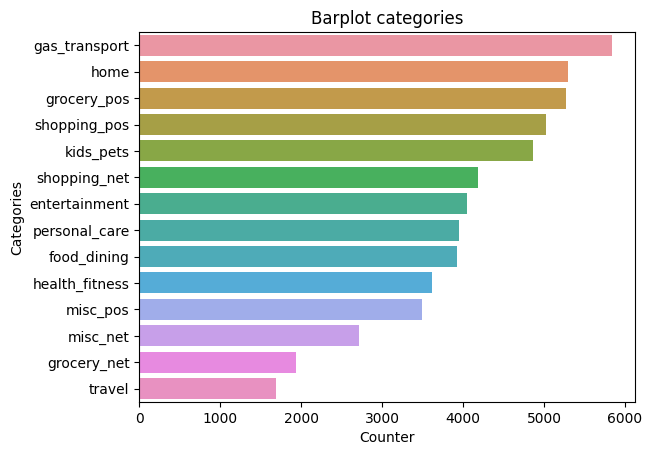

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y = 'category', 
              data= df, order=df['category'].value_counts().index);
plt.title('Barplot categories')
plt.ylabel('Categories')
plt.xlabel('Counter')

In [72]:
cat_count = df['category'].value_counts() #frac = 0.25 15000*0.25 = 3750; entries higher than 3750 will be dropped
cat_count

gas_transport     5835
home              5301
grocery_pos       5271
shopping_pos      5023
kids_pets         4865
shopping_net      4183
entertainment     4046
personal_care     3951
food_dining       3926
health_fitness    3611
misc_pos          3487
misc_net          2713
grocery_net       1931
travel            1691
Name: category, dtype: int64

In [73]:

df.drop(df[(df['category']== 'gas_transport')|
            (df['category']== 'home')|
            (df['category']== 'grocery_pos')| 
            (df['category']== 'shopping_pos')|
            (df['category']== 'kids_pets')|
            (df['category']== 'shopping_net')|
            (df['category']== 'entertainment')|
            (df['category']== 'personal_care')|
            (df['category']== 'food_dining')].index, inplace = True)


df['category'].value_counts()

health_fitness    3611
misc_pos          3487
misc_net          2713
grocery_net       1931
travel            1691
Name: category, dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13433 entries, 6 to 55832
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0.1           13433 non-null  int64         
 1   Unnamed: 0             13433 non-null  int64         
 2   trans_date_trans_time  13433 non-null  datetime64[ns]
 3   cc_num                 13433 non-null  int64         
 4   merchant               13433 non-null  object        
 5   category               13433 non-null  object        
 6   amt                    13433 non-null  float64       
 7   first                  13433 non-null  object        
 8   last                   13433 non-null  object        
 9   gender                 13433 non-null  object        
 10  street                 13433 non-null  object        
 11  city                   13433 non-null  object        
 12  state                  13433 non-null  object        
 13  z

##  3. API requests to exchange rate
### FROM https://github.com/Formicka/exchangerate.host/blob/master/README.md 

Currency conversion endpoint, can be used to convert any amount from one currency to another -- bellow variable $response$


In [75]:
import requests
import json

In [76]:
# 
currencies = df['currency'].unique()
rates = []


for i in currencies:
    response = requests.get('https://api.exchangerate.host/convert?from='+str(i)+'&to=COP')
    data = json.loads(response.text)
    data = list(data['info'].values())

    for i in data:
        rates.append(i)

currency_rate = dict(zip(currencies, rates))
currency_rate

df_rates = pd.DataFrame.from_dict(currency_rate, orient='index').reset_index(names = ['currency'])
df_rates

,currency,0
0,BRL,833.811643
1,USD,4574.222736
2,MXN,222.410689
3,EUR,4368.960507


In [77]:
#Testing
df = pd.merge(df,df_rates,on=['currency'])
df.head(3)

,Unnamed: 0.1,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,currency,0
0,171220,171220,2020-08-20 05:11:01,342952484382519,"fraud_Bernier, Streich and Jewess",grocery_net,10.89,Kayla,Jones,F,...,647,Comptroller,1987-09-26,1edb6f526690e3d8402b2001c3d907e1,1376975461,42.764616,-72.394134,0,BRL,833.811643
1,160693,160693,2020-08-16 20:51:36,577588686219,fraud_Klocko LLC,misc_net,239.81,James,Strickland,M,...,972,Public relations account executive,1997-10-23,994b2402d858ede43e6197b063b5c9e3,1376686296,39.686499,-78.596598,0,BRL,833.811643
2,294642,294642,2020-10-10 13:39:15,30546453310167,fraud_Adams-Barrows,health_fitness,123.84,Nicholas,Tran,M,...,7430,"Scientist, research (medical)",1955-01-13,4f71389a42a11cf51f3fedf65ea11953,1381412355,42.669160,-71.811038,0,BRL,833.811643


In [78]:
#Rename column 0 to rates, drop unnecesary columns ['Unnamed: 0.1', 'Unnamed: 0']

df = df.rename(columns={0:'rates'})
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace = True)
list(df.columns)

['trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'currency',
 'rates']

In [79]:
df['amt_cop'] = df['rates'] * df['amt'] #from another currency to COP rates = number

In [80]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,currency,rates,amt_cop
0,2020-08-20 05:11:01,342952484382519,"fraud_Bernier, Streich and Jewess",grocery_net,10.89,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,...,Comptroller,1987-09-26,1edb6f526690e3d8402b2001c3d907e1,1376975461,42.764616,-72.394134,0,BRL,833.811643,9080.208792
1,2020-08-16 20:51:36,577588686219,fraud_Klocko LLC,misc_net,239.81,James,Strickland,M,25454 Leonard Lake,Spring Church,...,Public relations account executive,1997-10-23,994b2402d858ede43e6197b063b5c9e3,1376686296,39.686499,-78.596598,0,BRL,833.811643,199956.370108
2,2020-10-10 13:39:15,30546453310167,fraud_Adams-Barrows,health_fitness,123.84,Nicholas,Tran,M,672 Randall Burg Suite 551,Belmont,...,"Scientist, research (medical)",1955-01-13,4f71389a42a11cf51f3fedf65ea11953,1381412355,42.669160,-71.811038,0,BRL,833.811643,103259.233869
3,2020-08-09 03:54:20,6538891242532018,fraud_McCullough LLC,misc_pos,34.14,Jodi,Rodriguez,F,5796 Lee Coves Apt. 286,Walnut Ridge,...,"Engineer, control and instrumentation",1977-03-23,4f3871b7750fc312f0c98619ada6b44a,1376020460,35.351900,-89.983282,0,BRL,833.811643,28466.329492
4,2020-11-14 06:49:11,4400011257587661852,fraud_Miller-Harris,misc_net,9.66,Marissa,Powell,F,474 Allen Haven,North Loup,...,"Nurse, children's",1980-09-15,6c97b525b2f27b4909294402350e1ba5,1384411751,41.395599,-97.910305,0,BRL,833.811643,8054.620471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13428,2020-07-23 10:07:46,340951438290556,"fraud_Johnson, Runolfsdottir and Mayer",misc_net,40.38,Maria,Garcia,F,865 Thomas Village,Orangeburg,...,Records manager,1971-07-02,bd0079745e0ac6a57dbefb32e30787d0,1374574066,40.520192,-74.441980,0,EUR,4368.960507,176418.625273
13429,2020-10-13 05:29:54,2288813824604479,fraud_Keeling-Crist,misc_pos,151.37,Barbara,Norman,F,6278 Stephanie Unions,New York City,...,Herbalist,1981-08-29,198e2fa63765e0a47fc4e88678b12ed9,1381642194,40.580356,-74.461230,0,EUR,4368.960507,661329.551945
13430,2020-09-07 21:23:04,4198470814557,"fraud_Lehner, Mosciski and King",misc_net,7.90,Christie,Williamson,F,519 Jerry Views,Avoca,...,Engineering geologist,1971-08-20,8407f164adb96684ab5551d1c2c786c2,1378588984,40.479614,-95.352894,0,EUR,4368.960507,34514.788005
13431,2020-10-04 14:20:00,4424338559877976,fraud_Block-Hauck,travel,9.35,Denise,Barnett,F,23220 Eaton Harbors,Kirby,...,Private music teacher,1957-11-12,e8b225a339d2cbe641aa021f2b2271a4,1380896400,41.221618,-84.005962,0,EUR,4368.960507,40849.780740


## Data wrangling


3.4 Calcule una nueva columna con los 6 primeros números de la columna ‘cc_num’ y llámela bin

In [81]:
df['bin'] = df['cc_num'].astype(str).str[:6] # create bin


In [82]:
df['bin'] = df['bin'].astype(int)

In [83]:
df.isnull().values.sum()

0

3. 5 Calcule en una nueva columna en la misma tabla la cuenta de números de tarjeta únicos
por ‘bin’ y por ‘merchant’ en toda la base 

In [84]:
#Unique values between bin and merchant
test0 = df.groupby(['bin'])['merchant'].nunique()
df_test0 = pd.DataFrame(test0).reset_index(names = ['bin', 'merchant'])
df_test0 = df_test0.set_index('bin')
df_test0
df= pd.merge(df, df_test0, on =['bin'])
df.head(3) 



,trans_date_trans_time,cc_num,merchant_x,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,currency,rates,amt_cop,bin,merchant_y
0,2020-08-20 05:11:01,342952484382519,"fraud_Bernier, Streich and Jewess",grocery_net,10.89,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,...,1edb6f526690e3d8402b2001c3d907e1,1376975461,42.764616,-72.394134,0,BRL,833.811643,9080.208792,342952,30
1,2020-08-20 05:11:01,342952484382519,"fraud_Bernier, Streich and Jewess",grocery_net,10.89,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,...,1edb6f526690e3d8402b2001c3d907e1,1376975461,42.764616,-72.394134,0,BRL,833.811643,9080.208792,342952,30
2,2020-07-21 19:36:23,342952484382519,fraud_Schumm PLC,health_fitness,14.44,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,...,118dd4f625a5682334eb6520b96ec395,1374435383,42.315580,-74.130053,0,BRL,833.811643,12040.240125,342952,30


In [85]:
df.isnull().values.sum()

0

In [86]:
#merchant_y is Merchant
# Renames a Header in the Dataframe
df = df.rename(columns={'merchant_x':'merchant', 'merchant_y':'Merchant'})
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'currency', 'rates', 'amt_cop', 'bin',
       'Merchant'],
      dtype='object')

In [87]:
#Unique values between bin and merchant
test0 = df.groupby(['cc_num'])['merchant'].nunique()
df_test0 = pd.DataFrame(test0).reset_index(names = ['cc_num', 'merchant'])
df_test0 = df_test0.set_index('cc_num')
#df_test0
df= pd.merge(df, df_test0, on =['cc_num'])
df.head(3) 

,trans_date_trans_time,cc_num,merchant_x,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,currency,rates,amt_cop,bin,Merchant,merchant_y
0,2020-08-20 05:11:01,342952484382519,"fraud_Bernier, Streich and Jewess",grocery_net,10.89,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,...,1376975461,42.764616,-72.394134,0,BRL,833.811643,9080.208792,342952,30,30
1,2020-08-20 05:11:01,342952484382519,"fraud_Bernier, Streich and Jewess",grocery_net,10.89,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,...,1376975461,42.764616,-72.394134,0,BRL,833.811643,9080.208792,342952,30,30
2,2020-07-21 19:36:23,342952484382519,fraud_Schumm PLC,health_fitness,14.44,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,...,1374435383,42.315580,-74.130053,0,BRL,833.811643,12040.240125,342952,30,30


In [88]:
df = df.rename(columns={'merchant_x':'merchant', 'merchant_y':'Calculo'})
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'currency', 'rates', 'amt_cop', 'bin',
       'Merchant', 'Calculo'],
      dtype='object')

In [89]:
df.isnull().values.sum()

0

3.6. De manera similar, en otra columna, calcule cuántos códigos ZIP se registraron por cada
ciudad. 

In [90]:
test0 = df.groupby(['city'])['zip'].nunique()
#test0 

df_test0 = pd.DataFrame(test0).reset_index(names = ['city', 'zip'])
#
df_test0 = df_test0.set_index('city')
#df_test0
df= pd.merge(df, df_test0, on =['city']) 
df.head(3) 



,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,currency,rates,amt_cop,bin,Merchant,Calculo,zip_y
0,2020-08-20 05:11:01,342952484382519,"fraud_Bernier, Streich and Jewess",grocery_net,10.89,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,...,42.764616,-72.394134,0,BRL,833.811643,9080.208792,342952,30,30,1
1,2020-08-20 05:11:01,342952484382519,"fraud_Bernier, Streich and Jewess",grocery_net,10.89,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,...,42.764616,-72.394134,0,BRL,833.811643,9080.208792,342952,30,30,1
2,2020-07-21 19:36:23,342952484382519,fraud_Schumm PLC,health_fitness,14.44,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,...,42.315580,-74.130053,0,BRL,833.811643,12040.240125,342952,30,30,1


In [91]:
#Renames zip_y counter by city

df = df.rename(columns={'zip_x':'zip', 'zip_y':'zip_by_city'})
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'currency', 'rates', 'amt_cop', 'bin',
       'Merchant', 'Calculo', 'zip_by_city'],
      dtype='object')

3.7. En columnas diferentes, calcule el número de transacciones que cada pagador (nombre
y apellido) hizo en la misma hora y en el mismo día de la fecha de cada transacción.


In [92]:
from datetime import *

In [93]:
df['name'] = df['first'].astype(str) +' '+ df['last'] #new column to name
df['day'] = df['trans_date_trans_time'].dt.day_name() #new column to day name
df['hour'] = df['trans_date_trans_time'].dt.hour #new column to hour
df['date'] = df['trans_date_trans_time'].dt.date #new column to date
 
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,rates,amt_cop,bin,Merchant,Calculo,zip_by_city,name,day,hour,date
0,2020-08-20 05:11:01,342952484382519,"fraud_Bernier, Streich and Jewess",grocery_net,10.89,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,...,833.811643,9080.208792,342952,30,30,1,Kayla Jones,Thursday,5,2020-08-20
1,2020-08-20 05:11:01,342952484382519,"fraud_Bernier, Streich and Jewess",grocery_net,10.89,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,...,833.811643,9080.208792,342952,30,30,1,Kayla Jones,Thursday,5,2020-08-20


In [94]:
df_ag1 = df.groupby(['name'])[['date']].agg({'date':'count'}) #grouping by same date and name
df_ag2 = df.groupby(['name'])[['hour']].agg({'hour':'count'}) #grouping by same hour and name

#merging
df = pd.merge(df, df_ag1, on =['name']) 
df = pd.merge(df, df_ag2, on =['name']) 
#rename columns
df = df.rename(columns={'date_x':'date', 'date_y':'date_counter', 'hour_x':'hour', 'hour_y':'hour_counter'})



3.8. Asigne el valor 1 en la columna ‘is_fraud’ cuando los valores calculados en los tres puntos
anteriores se ubiquen por encima del promedio. En caso contrario, deje los valores que
ya están en esa variable.

In [95]:
df.describe(include = [np.number])


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,rates,amt_cop,bin,Merchant,Calculo,zip_by_city,hour,date_counter,hour_counter
count,1.343300e+04,13433.000000,13433.000000,13433.000000,13433.000000,1.343300e+04,1.343300e+04,13433.000000,13433.000000,13433.000000,13433.000000,1.343300e+04,13433.000000,13433.000000,13433.000000,13433.000000,13433.000000,13433.000000,13433.000000
mean,4.207385e+17,65.170153,48551.614755,38.562406,-90.160649,8.815250e+04,1.380680e+09,38.566527,-90.161811,0.004020,2513.025700,1.653109e+05,409412.413311,20.251619,19.491476,1.153726,11.944837,20.944614,20.944614
std,1.313871e+18,169.067617,26856.164504,5.054902,13.769688,2.885508e+05,5.183473e+06,5.091345,13.773298,0.063278,1985.558567,5.320717e+05,119710.646388,10.580056,9.484530,0.451287,6.907045,10.757198,10.757198
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.057758,-166.611810,0.000000,222.410689,2.224107e+02,180011.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,1.800365e+14,6.600000,25832.000000,34.703100,-96.727000,7.650000e+02,1.376039e+09,34.770579,-96.808228,0.000000,833.811643,7.826632e+03,351236.000000,13.000000,12.000000,1.000000,6.000000,13.000000,13.000000
50%,3.523843e+15,27.790000,47838.000000,39.390000,-86.992000,2.691000e+03,1.380770e+09,39.431935,-87.204620,0.000000,4368.960507,3.120123e+04,385804.000000,19.000000,19.000000,1.000000,12.000000,20.000000,20.000000
75%,4.634956e+15,68.470000,71960.000000,41.838300,-80.158000,2.190200e+04,1.385869e+09,41.935190,-80.217256,0.000000,4574.222736,1.478456e+05,474599.000000,26.000000,25.000000,1.000000,18.000000,27.000000,27.000000
max,4.992346e+18,5373.720000,99783.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.644397,-67.002451,1.000000,4574.222736,1.860622e+07,676372.000000,68.000000,51.000000,4.000000,23.000000,57.000000,57.000000


In [96]:
mean_Merchant = df['Merchant'].mean()
mean_Calculo = df['Calculo'].mean()
mean_zip_by_city = df['zip_by_city'].mean()
mean_hour_counter = df['hour_counter'].mean()
mean_date_counter = df['date_counter'].mean()


for i in range(0, len(df)):
    if (df.loc[i, 'Merchant'] >= mean_Merchant or 
        df.loc[i, 'Calculo'] >= mean_Calculo or 
        df.loc[i, 'zip_by_city'] >= mean_zip_by_city or 
        df.loc[i, 'hour_counter'] >= mean_hour_counter or
        df.loc[i, 'date_counter'] >= mean_date_counter):

        df.loc[i, 'is_fraud'] = 1
    else:
        df.loc[i, 'is_fraud'] = 0

df.head(2)



,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,bin,Merchant,Calculo,zip_by_city,name,day,hour,date,date_counter,hour_counter
0,2020-08-20 05:11:01,342952484382519,"fraud_Bernier, Streich and Jewess",grocery_net,10.89,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,...,342952,30,30,1,Kayla Jones,Thursday,5,2020-08-20,33,33
1,2020-08-20 05:11:01,342952484382519,"fraud_Bernier, Streich and Jewess",grocery_net,10.89,Kayla,Jones,F,6033 Young Track Suite 804,East Canaan,...,342952,30,30,1,Kayla Jones,Thursday,5,2020-08-20,33,33


3.9. En una nueva tabla, calcule para cada comercio (‘merchant’), el número de transacciones,
la suma del monto de todas las transacciones en pesos colombianos, el número de
fraudes, la suma del monto con fraude, el porcentaje de fraude por número de
transacciones y por monto, el número de tarjetas distintas (‘cc_num’).

In [97]:
# copy from the original with the variables needed to make aggregations requiered

df2 = df[['merchant', 'cc_num', 'trans_date_trans_time', 'amt_cop', 'is_fraud']].copy()

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13433 entries, 0 to 13432
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   merchant               13433 non-null  object        
 1   cc_num                 13433 non-null  int64         
 2   trans_date_trans_time  13433 non-null  datetime64[ns]
 3   amt_cop                13433 non-null  float64       
 4   is_fraud               13433 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.1+ MB


3.9.1. Numero de transacciones

In [98]:
df_ag = df2.groupby(['merchant'])[['trans_date_trans_time']].agg({'trans_date_trans_time':'count'}) # number of transaction per merchant

df2= pd.merge(df2, df_ag, on =['merchant'])
df2 = df2.rename(columns={'trans_date_trans_time_x':'trans_date_trans_time', 'trans_date_trans_time_y':'trans_counter'}) #rename 
df2.head(2)


,merchant,cc_num,trans_date_trans_time,amt_cop,is_fraud,trans_counter
0,"fraud_Bernier, Streich and Jewess",342952484382519,2020-08-20 05:11:01,9080.208792,1,55
1,"fraud_Bernier, Streich and Jewess",342952484382519,2020-08-20 05:11:01,9080.208792,1,55


3.9.2. Suma del monto de todas las transacciones en COP

In [99]:
df_ag = df2.groupby(['merchant'])[['amt_cop']].agg({'amt_cop':'sum'}) # total amount trans per merchant


df2= pd.merge(df2, df_ag, on =['merchant'])
df2 = df2.rename(columns={'amt_cop_x':'amt_cop', 'amt_cop_y':'total_amt'}) #rename 
df2.head(2)

,merchant,cc_num,trans_date_trans_time,amt_cop,is_fraud,trans_counter,total_amt
0,"fraud_Bernier, Streich and Jewess",342952484382519,2020-08-20 05:11:01,9080.208792,1,55,8.355669e+06
1,"fraud_Bernier, Streich and Jewess",342952484382519,2020-08-20 05:11:01,9080.208792,1,55,8.355669e+06


3.9.3. Número de fraudes

In [100]:
df_ag = df2.groupby(['merchant'])[['is_fraud']].agg({'is_fraud':'sum'}) # total fraud per merchant


df2= pd.merge(df2, df_ag, on =['merchant'])
df2 = df2.rename(columns={'is_fraud_x':'is_fraud', 'is_fraud_y':'fraud_counter'}) #rename 
df2.head(2)

,merchant,cc_num,trans_date_trans_time,amt_cop,is_fraud,trans_counter,total_amt,fraud_counter
0,"fraud_Bernier, Streich and Jewess",342952484382519,2020-08-20 05:11:01,9080.208792,1,55,8.355669e+06,36
1,"fraud_Bernier, Streich and Jewess",342952484382519,2020-08-20 05:11:01,9080.208792,1,55,8.355669e+06,36


3.9.4. Suma del monto con fraude

In [101]:
mask = df2[df2['is_fraud'] == 1]

df_ag = mask.groupby(['merchant'])[['amt_cop']].agg({'amt_cop':'sum'}) 

df2 = pd.merge(df2, df_ag, on =['merchant'])
df2 = df2.rename(columns={'amt_cop_x':'amt_cop', 'amt_cop_y':'fraud_amt'}) #rename 
df2.head(2)



,merchant,cc_num,trans_date_trans_time,amt_cop,is_fraud,trans_counter,total_amt,fraud_counter,fraud_amt
0,"fraud_Bernier, Streich and Jewess",342952484382519,2020-08-20 05:11:01,9080.208792,1,55,8.355669e+06,36,4.232007e+06
1,"fraud_Bernier, Streich and Jewess",342952484382519,2020-08-20 05:11:01,9080.208792,1,55,8.355669e+06,36,4.232007e+06


3.9.5. El porcentaje de fraude por número de
transacciones y por monto

In [102]:
df2['perc_fraud_by_trans'] = (df2.trans_counter * df2.fraud_counter)//100
df2['perc_fraud_amt'] = (df2.fraud_amt*100)//df2.total_amt


In [103]:
df2.dtypes

merchant                         object
cc_num                            int64
trans_date_trans_time    datetime64[ns]
amt_cop                         float64
is_fraud                          int64
trans_counter                     int64
total_amt                       float64
fraud_counter                     int64
fraud_amt                       float64
perc_fraud_by_trans               int64
perc_fraud_amt                  float64
dtype: object

In [104]:
df2

,merchant,cc_num,trans_date_trans_time,amt_cop,is_fraud,trans_counter,total_amt,fraud_counter,fraud_amt,perc_fraud_by_trans,perc_fraud_amt
0,"fraud_Bernier, Streich and Jewess",342952484382519,2020-08-20 05:11:01,9.080209e+03,1,55,8.355669e+06,36,4.232007e+06,19,50.0
1,"fraud_Bernier, Streich and Jewess",342952484382519,2020-08-20 05:11:01,9.080209e+03,1,55,8.355669e+06,36,4.232007e+06,19,50.0
2,"fraud_Bernier, Streich and Jewess",4587657402165341815,2020-12-29 09:23:42,2.989200e+03,1,55,8.355669e+06,36,4.232007e+06,19,50.0
3,"fraud_Bernier, Streich and Jewess",4191109180926792,2020-09-13 06:26:06,9.612590e+03,1,55,8.355669e+06,36,4.232007e+06,19,50.0
4,"fraud_Bernier, Streich and Jewess",6523180720198790,2020-12-06 07:50:27,2.900972e+05,0,55,8.355669e+06,36,4.232007e+06,19,50.0
...,...,...,...,...,...,...,...,...,...,...,...
13428,"fraud_Hagenes, Hermann and Stroman",3560336828629935,2020-09-21 20:04:59,9.741588e+02,0,34,2.232533e+07,14,1.800589e+07,4,80.0
13429,"fraud_Hagenes, Hermann and Stroman",30373802285317,2020-08-15 23:21:46,5.469804e+03,0,34,2.232533e+07,14,1.800589e+07,4,80.0
13430,"fraud_Hagenes, Hermann and Stroman",3560725013359375,2020-09-06 21:50:54,7.406276e+02,1,34,2.232533e+07,14,1.800589e+07,4,80.0
13431,"fraud_Hagenes, Hermann and Stroman",372246459334925,2020-09-13 13:59:04,1.058941e+03,0,34,2.232533e+07,14,1.800589e+07,4,80.0


In [105]:
print(df2.perc_fraud_amt.unique())
print(df2.perc_fraud_by_trans.unique())


[50. 46. 13. 44. 53. 37. 71. 52. 78. 33. 40.  0. 90. 57. 88. 70. 79. 77.
 69. 41. 59. 66. 74. 65. 45.  9. 49. 28. 60. 67. 75. 72. 82. 54. 43. 56.
 63. 38. 85. 80. 64. 55. 29. 32. 12.  3. 42. 36. 89. 73. 35.  1. 97. 34.
 16. 92. 48. 26. 51. 30. 31. 68. 58. 62. 47.  4. 18. 25. 83. 76. 61. 39.
 84. 19. 10. 11. 20. 96. 91.]
[19 28 16 25 40 30  9 26 34 15  7 10 31 33 22 27 32 50  8 12  4 36 23 11
  6 14 29 18 42 37 24 17  3  5 21 56 35 44 13 20  2]


3.9.6. El número de tarjetas distintas (‘cc_num’)

In [106]:
df_ag = df2.groupby(['merchant'])['cc_num'].nunique()

df2= pd.merge(df2, df_ag, on =['merchant'])
df2 = df2.rename(columns={'cc_num_x':'cc_num', 'cc_num_y':'dist_card'}) #rename 
df2.head(2)

,merchant,cc_num,trans_date_trans_time,amt_cop,is_fraud,trans_counter,total_amt,fraud_counter,fraud_amt,perc_fraud_by_trans,perc_fraud_amt,dist_card
0,"fraud_Bernier, Streich and Jewess",342952484382519,2020-08-20 05:11:01,9080.208792,1,55,8.355669e+06,36,4.232007e+06,19,50.0,50
1,"fraud_Bernier, Streich and Jewess",342952484382519,2020-08-20 05:11:01,9080.208792,1,55,8.355669e+06,36,4.232007e+06,19,50.0,50


In [107]:
print(df2.dist_card.unique())

[ 50  72  58  60  85  67  36  64  61  56  68  53  43  69  33  71  51  74
  55  84  54  34  48  44  79  46  66  39  47  52  30  73  70  41  45  59
  35  29  83  28  23  32  31  62  57  63  86  38  42  75 101  22  25  40
  49  81  26  27  37  24  76]


In [108]:
df2.columns

Index(['merchant', 'cc_num', 'trans_date_trans_time', 'amt_cop', 'is_fraud',
       'trans_counter', 'total_amt', 'fraud_counter', 'fraud_amt',
       'perc_fraud_by_trans', 'perc_fraud_amt', 'dist_card'],
      dtype='object')

In [109]:
df2.to_csv('fraud_aggregations.csv', index = False, encoding = 'utf-8') #download dataset

## 4. Cree una tabla en la base de datos con el resultado del punto anterior

In [110]:
import sqlalchemy as db
from sqlalchemy import create_engine

In [111]:
engine = db.create_engine(
    "mysql+pymysql://{0}:{1}@{2}/{3}".format(db_username, db_pwd, db_host, db_name))

Aqui se ejecuta la carga de la tabla "test_prueba_fraud":

In [113]:
# conect = db_conn.connect()
# metadata = db.MetaData()


# df2.to_sql('test_prueba_fraud', conect) # dataframe is loaded to mysql

In [115]:
#testing query

print(pd.read_sql(
    
    '''
    SELECT COUNT(DISTINCT merchant) FROM test_prueba_fraud;
    '''
    
    , engine.connect()))

   COUNT(DISTINCT merchant)
0                       249


## PUNTO EXTRA


https://app.powerbi.com/view?r=eyJrIjoiNzdmZDRmYmQtYjJmNi00MzJhLTk3N2EtZmFiYzhiMzE3MjAyIiwidCI6Ijk5ZjdiNTVlLTljYmUtNDY3Yi04MTQzLTkxOTc4MjkxOGFmYiIsImMiOjR9